# Neural networks Implementation from scratch

## Importing necessary libraries

In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F

## Downloading the dataset

In [ ]:
data = datasets.EMNIST(root='data', split='letters', download=True)

100%|██████████| 562M/562M [00:09<00:00, 58.5MB/s]


## Inspecting the shapes of the dataset

In [ ]:
X = data.data
y = data.targets

X.shape,y.shape

(torch.Size([124800, 28, 28]), torch.Size([124800]))

## (EDA) Inspecting the images and labels

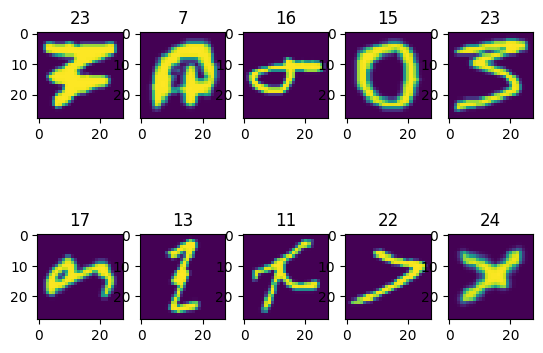

In [ ]:
for i, (image, label) in zip(range(1, 11), data):
        plt.subplot(2, 5, i)
        plt.imshow(X=image)
        plt.title(label=label)


## Selecting the vowel letters only (5 class multi-class classification)

In [ ]:
selected_classes = [1, 5, 9, 15, 21]  # These represent vowels: a, e, i, o, u
samples_per_class = 1500

selected_indices = []

for cls in selected_classes:
    class_indices = torch.where(y == cls)[0]

    shuffled_indices = torch.randperm(class_indices.shape[0])

    chosen_indices = class_indices[shuffled_indices[:samples_per_class]]

    selected_indices.append(chosen_indices)

final_indices = torch.cat(selected_indices, dim=0)

X = X[final_indices]
y = y[final_indices]

print("Selected X shape:", X.shape)
print("Selected y shape:", y.shape)

Selected X shape: torch.Size([7500, 28, 28])
Selected y shape: torch.Size([7500])


## Reshaping and Pixel Normalization

In [ ]:
indices = torch.randperm(X.shape[0])
X = X[indices]
y = y[indices]

total_pixels = X.shape[1] * X.shape[2]

X = X.view(-1,total_pixels)
X = X / 255.0
X.shape

torch.Size([7500, 784])

## Train Test Splitting

In [ ]:
train_size = int(0.8 * X.shape[0])
test_size = X.shape[0] - train_size

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

## Compare gradient function

In [ ]:
def compare_grad(grad1, grad2):
  print(torch.max(torch.abs(grad1 - grad2)))

## Label Mapping for y_train

In [ ]:
label_mapping = {1: 0, 5: 1, 9: 2, 15: 3, 21: 4}
y_train = torch.tensor([label_mapping[label.item()] for label in y_train])
y_test = torch.tensor([label_mapping[label.item()] for label in y_test])

## Definition of Activation Functions

In [ ]:
def tanh(val):
  return (torch.exp(val) - torch.exp(-val)) / (torch.exp(val) + torch.exp(-val))

def relu(val):
  return torch.max(val, torch.zeros_like(val))

## 1 hidden layer NN with tanh activation function

Implementations
- tanh
- 1 hidden layer
- batch normalization

## Trial and Test

In [ ]:
# temp_tens = torch.tensor([
#     [1,2,3],
#     [4,5,6],
# ], dtype = torch.float32)

# print(temp_tens.sum(0))
# print(temp_tens.sum(0, keepdim = True))
# print()
# print(temp_tens.sum(1))
# print(temp_tens.sum(1, keepdim = True))
# print()
# print(temp_tens.mean(0))
# print(temp_tens.mean(0, keepdim = True))
# print()
# print(temp_tens.mean(1))
# print(temp_tens.mean(1, keepdim = True))

torch.Size([2, 3])
3
2

tensor([5., 7., 9.])
tensor([[5., 7., 9.]])

tensor([ 6., 15.])
tensor([[ 6.],
        [15.]])

tensor([2.5000, 3.5000, 4.5000])
tensor([[2.5000, 3.5000, 4.5000]])

tensor([2., 5.])
tensor([[2.],
        [5.]])


## Xavier Initialization

In [ ]:
import math

In [ ]:
def xavier_normal_init(tensor):
  mean = 0
  dims = tensor.dim()
  if dims != 2:
    raise ValueError("Only 2D tensors are supported")
  n_in = tensor.size(0)
  n_out = tensor.size(1)

  std_dev = math.sqrt(2.0 / float(n_in + n_out))

  with torch.no_grad():
    return tensor.normal_(mean, std_dev)

## Dropout Implementation

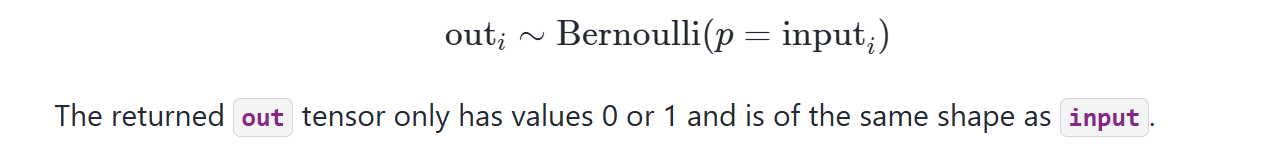

## Dropout Test and Trial

In [ ]:
temp = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float32)
p = 0.3

prob_tensor = (1 - p) * torch.ones(temp.shape)

mask = torch.bernoulli(prob_tensor)

scale_factor = mask / (1 - p)

final_tensor_after_dropout = temp * scale_factor

print(prob_tensor)
print(mask)
print(scale_factor)
print("Original Tensor :: ")
print(temp)
print("---------------------------------")
print("Tensor after dropout ::")
print(final_tensor_after_dropout)

tensor([[0.7000, 0.7000, 0.7000],
        [0.7000, 0.7000, 0.7000],
        [0.7000, 0.7000, 0.7000]])
tensor([[1., 1., 1.],
        [0., 1., 1.],
        [1., 0., 1.]])
tensor([[1.4286, 1.4286, 1.4286],
        [0.0000, 1.4286, 1.4286],
        [1.4286, 0.0000, 1.4286]])
Original Tensor :: 
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
---------------------------------
Tensor after dropout ::
tensor([[ 1.4286,  2.8571,  4.2857],
        [ 0.0000,  7.1429,  8.5714],
        [10.0000,  0.0000, 12.8571]])


In [ ]:
def dropout(tensor, p):
    prob_tensor = (1 - p) * torch.ones(tensor.shape)

    bernoulli_mask = torch.bernoulli(prob_tensor)

    scale_factor =  bernoulli_mask / (1 - p)
    return tensor * scale_factor

In [ ]:
# Defining the learnable parameters
w1 = torch.empty(total_pixels, 32, requires_grad=True)
b1 = torch.zeros(32, requires_grad=True)
w2 = torch.empty(32, 5, requires_grad=True)
b2 = torch.zeros(5,requires_grad=True)
gamma = torch.ones(32, requires_grad=True)
beta = torch.ones(32, requires_grad=True)

w1 = xavier_normal_init(w1)
w2 = xavier_normal_init(w2)

lr = 0.1
loss_list = []

for i in range(1000):
  # Forward Pass
  z1 = X_train @ w1 + b1

  # Batch Norm
  z1mean = 1/X_train.shape[0] * z1.sum(0, keepdim = True)
  diff = z1 - z1mean
  z1var = 1/X_train.shape[0] * (diff ** 2).sum(0, keepdim = True)
  z1var_inv = (z1var + 1e-8) ** (-0.5) # 1e-8 is the noise
  z1_new = diff * z1var_inv

  # Scale and Shift of the batch norm
  z1_shifted = gamma * z1_new + beta

  # Hidden layer
  h1 = tanh(z1_shifted)

  logit = h1 @ w2 + b2
  logit_max = logit.max(dim = 1, keepdim = True).values
  logit_new = logit - logit_max

  # Softmax calculation begin here
  logit_exp = logit_new.exp()
  logit_exp_sum = logit_exp.sum(dim = 1, keepdim = True)
  logit_exp_sum_inv = logit_exp_sum ** (-1)
  probs = logit_exp * logit_exp_sum_inv
  # Softmax ends here

  # Cross entropy calculation begins here
  log_probs = torch.log(probs)
  L = - log_probs[torch.arange(X_train.shape[0]), y_train].mean()
  loss_list.append(L.item())
  # Cross entropy ends here

  step_variables_list = [
      w1,b1,
      w2,b2,
      logit,
      logit_max,
      logit_new,
      logit_exp,
      logit_exp_sum,
      logit_exp_sum_inv,
      probs,
      log_probs,
      h1,z1,
      z1_shifted,z1mean,diff,z1var,z1var_inv,z1_new,
      gamma,beta
  ]
  # for item in step_variables_list:
  #   item.retain_grad()
  # L.backward()

  # Backpropagation
  # Manual backpropagation
  dL_dlogprobs = torch.zeros_like(log_probs)
  dL_dlogprobs[torch.arange(X_train.shape[0]), y_train] = -1 / X_train.shape[0]

  dL_dprobs = (probs)**(-1) * dL_dlogprobs

  dL_dlogit_exp_sum_inv = (logit_exp * dL_dprobs).sum(1, keepdim = True)

  # 1st half of calculation
  dL_dlogit_exp = logit_exp_sum_inv * dL_dprobs

  dL_dlogit_exp_sum = -(logit_exp_sum ** (-2)) * dL_dlogit_exp_sum_inv

  # 2nd half calculation
  dL_dlogit_exp += torch.ones_like(logit_exp) * dL_dlogit_exp_sum

  dL_dlogit_new = logit_new.exp() * dL_dlogit_exp

  dL_dlogit_max = - dL_dlogit_new.sum(1, keepdim = True)

  dL_dlogit = dL_dlogit_new.clone()

  # Self-implementation of the one-hot
  mask = (logit == logit.max(1, keepdim=True).values)
  mask = mask.int()
  dL_dlogit += mask * dL_dlogit_max

  dL_dw2 = h1.T @ dL_dlogit
  dL_db2 = dL_dlogit.sum(0)

  dL_dh1 = dL_dlogit @ w2.T
  dL_dz1_shifted  = (1 - h1 ** 2) * dL_dh1

  dL_dz1_new = gamma * dL_dz1_shifted
  dL_dgamma = (z1_new * dL_dz1_shifted).sum(0, keepdim = True)
  dL_dbeta = dL_dz1_shifted.sum(0, keepdim = True)
  dL_dz1var_inv = (diff * dL_dz1_new).sum(0, keepdim=True)
  dL_diff = z1var_inv * dL_dz1_new
  dL_dz1var = (-0.5 * (z1var + 1e-5) ** (-1.5)) * dL_dz1var_inv
  # temp = (1/X_train.shape[0]) * torch.ones_like(diff) * dL_dz1var
  # dL_diff += 2*diff*temp
  dL_diff += (2 / X_train.shape[0]) * diff * dL_dz1var
  dL_dz1 = dL_diff - dL_diff.mean(dim=0, keepdim=True)
  dL_dw1 = X_train.T @ dL_dz1
  dL_db1 = dL_dz1.sum(0)

  with torch.no_grad():
    w1 -= lr * dL_dw1
    b1 -= lr * dL_db1
    w2 -= lr * dL_dw2
    b2 -= lr * dL_db2

## Checking if the manual and auto grad's gradients match

In [ ]:
# print("..........................................")
# compare_grad(w1.grad,dL_dw1)
# print(torch.allclose(w1.grad,dL_dw1))
# print("..........................................")
# compare_grad(b1.grad,dL_db1)
# print(torch.allclose(b1.grad,dL_db1))
# print("..........................................")
# compare_grad(w2.grad,dL_dw2)
# print(torch.allclose(w2.grad,dL_dw2))
# print("..........................................")
# compare_grad(b2.grad,dL_db2)
# print(torch.allclose(b2.grad,dL_db2))
# print("..........................................")
# print(torch.allclose(log_probs.grad, dL_dlogprobs))
# compare_grad(log_probs.grad, dL_dlogprobs)
# print("..........................................")
# print(torch.allclose(probs.grad, dL_dprobs))
# compare_grad(probs.grad, dL_dprobs)
# print("..........................................")
# print(torch.allclose(logit_exp_sum_inv.grad, dL_dlogit_exp_sum_inv))
# compare_grad(logit_exp_sum_inv.grad, dL_dlogit_exp_sum_inv)
# print("..........................................")
# print(torch.allclose(logit_exp_sum.grad, dL_dlogit_exp_sum))
# compare_grad(logit_exp_sum.grad, dL_dlogit_exp_sum)
# print("..........................................")
# print(torch.allclose(logit_exp.grad, dL_dlogit_exp))
# compare_grad(logit_exp.grad, dL_dlogit_exp)
# print("..........................................")
# print(torch.allclose(logit_new.grad, dL_dlogit_new))
# compare_grad(logit_new.grad, dL_dlogit_new)
# print("..........................................")
# print(torch.allclose(logit_max.grad, dL_dlogit_max))
# compare_grad(logit_max.grad, dL_dlogit_max)
# print("..........................................")
# print(torch.allclose(logit.grad, dL_dlogit))
# compare_grad(logit.grad, dL_dlogit)
# print("..........................................")
# print(torch.allclose(h1.grad, dL_dh1))
# compare_grad(h1.grad, dL_dh1)
# print("..........................................")
# print(torch.allclose(z1.grad, dL_dz1))
# compare_grad(z1.grad, dL_dz1)
# print("..........................................")
# print(torch.allclose(z1_max.grad, dL_dz1_max))
# compare_grad(w1.grad, dL_dw1)
# print("..........................................")
# print(torch.allclose(z1_new.grad, dL_dz1_new))
# compare_grad(z1_new.grad, dL_dz1_new)
# print("..........................................")
# print(torch.allclose(z1_shifted.grad, dL_dz1_shifted))
# compare_grad(z1_shifted.grad, dL_dz1_shifted)
# print("..........................................")
# print(torch.allclose(z1_new.grad, dL_dz1_new))
# compare_grad(z1_new.grad, dL_dz1_new)
# print("..........................................")
# print(torch.allclose(z1var_inv.grad, dL_dz1var_inv))
# compare_grad(z1var_inv.grad, dL_dz1var_inv)
# print("..........................................")
# print(torch.allclose(gamma.grad, dL_dgamma))
# compare_grad(gamma.grad, dL_dgamma)
# print("..........................................")
# print(torch.allclose(beta.grad, dL_dbeta))
# compare_grad(beta.grad, dL_dbeta)
# print("..........................................")
# print(torch.allclose(diff.grad, dL_diff))
# compare_grad(diff.grad, dL_diff) #Diff
# print("..........................................")
# print(torch.allclose(z1var.grad, dL_dz1var))
# compare_grad(z1var.grad, dL_dz1var)
# print("..........................................")
# print(torch.allclose(z1mean.grad, dL_dz1mean))
# compare_grad(z1mean.grad, dL_dz1mean)
# print("..........................................")
# print(torch.allclose(z1.grad, dL_dz1))
# compare_grad(z1.grad, dL_dz1)



## Plotting the loss

0.06828437000513077


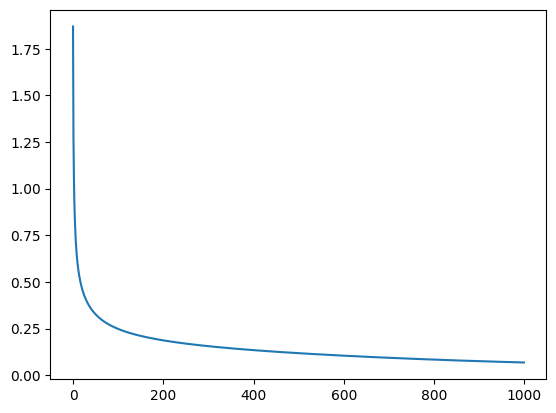

In [ ]:
plt.plot(loss_list)
print(loss_list[-1])

## Inferencing the model

In [ ]:
# Inference
y_preds = X_test @ w1 + b1

z1mean = 1/X_test.shape[0] * y_preds.sum(0, keepdim = True)
diff = y_preds - z1mean
z1var = 1/X_test.shape[0] * (diff ** 2).sum(0, keepdim = True)
z1var_inv = (z1var + 1e-5) ** (-0.5) # 1e-5 is the noise
z1_new = diff * z1var_inv

z1_shifted = gamma * z1_new + beta

h1 = tanh(z1_shifted)

y_preds = h1 @ w2 + b2

# Softmax application
logit_max = y_preds.max(dim=1, keepdim=True).values
logit_new = y_preds - logit_max
logit_exp = logit_new.exp()
logit_exp_sum = logit_exp.sum(dim=1, keepdim=True)
logit_exp_sum_inv = logit_exp_sum ** (-1)
probs = logit_exp * logit_exp_sum_inv

# Predicted class = argmax of probabilities
pred_labels = probs.argmax(dim=1)
print(pred_labels[:10])
print(y_test[:10])

correct_predictions = (y_test == pred_labels).sum()
total_samples = y_test.shape[0]
accuracy = correct_predictions.item() / total_samples

print("Correct Predictions:", correct_predictions.item(),"out of", total_samples)
print(f"Accuracy: {accuracy:.4f}")

tensor([3, 0, 1, 2, 3, 4, 4, 3, 4, 4])
tensor([3, 0, 1, 2, 3, 4, 4, 3, 4, 4])
Correct Predictions: 1424 out of 1500
Accuracy: 0.9493


# 3 hidden layer NN for the same classification task

In [ ]:
def initialize_w_b(input_dim):
  n1 = 8
  n2 = 4
  n3 = 2
  w1 = torch.empty((input_dim, n1), requires_grad=True) * 0.01
  b1 = torch.zeros(n1, requires_grad=True)

  w2 = torch.empty((n1, n2), requires_grad=True) * 0.01
  b2 = torch.zeros(n2, requires_grad=True)

  w3 = torch.empty((n2, n3), requires_grad=True) * 0.01
  b3 = torch.zeros(n3, requires_grad=True)

  w4 = torch.empty((n3, 5), requires_grad=True) * 0.01
  b4 = torch.zeros(5, requires_grad=True)

  w1 = xavier_normal_init(w1)
  w2 = xavier_normal_init(w2)
  w3 = xavier_normal_init(w3)
  w4 = xavier_normal_init(w4)

  return (w1, b1, w2, b2, w3, b3, w4, b4)

In [ ]:
w1,b1,w2,b2,w3,b3,w4,b4 = initialize_w_b(total_pixels)
lr = 0.05
loss_list = []

for i in range(1000):
  # Forward Pass
  z1 = X_train @ w1 + b1
  # z1_max = z1.max(dim = 1, keepdim = True).values
  # z1 = z1 - z1_max
  h1 = tanh(z1)

  z2 = h1 @ w2+ b2
  h2 = tanh(z2)

  z3 = h2 @ w3 + b3
  h3 = tanh(z3)

  logit = h3 @ w4 + b4
  logit_max = logit.max(dim = 1, keepdim = True).values
  logit_new = logit - logit_max
  # Softmax calculation begin here
  logit_exp = logit_new.exp()
  logit_exp_sum = logit_exp.sum(dim = 1, keepdim = True)
  logit_exp_sum_inv = logit_exp_sum ** (-1)
  probs = logit_exp * logit_exp_sum_inv
  # Softmax ends here
  # Cross entropy calculation begins here
  log_probs = torch.log(probs)
  L = - log_probs[torch.arange(X_train.shape[0]), y_train].mean()
  loss_list.append(L.item())
  # Cross entropy ends here

  step_variables_list = [
      w1,b1,
      w2,b2,
      w3,b3,
      w4,b4,
      logit,
      logit_max,
      logit_new,
      logit_exp,
      logit_exp_sum,
      logit_exp_sum_inv,
      probs,
      log_probs,
      h1,h2,h3,
      z1,z2,z3
  ]
  # for item in step_variables_list:
  #   item.retain_grad()
  # L.backward()

  # Backpropagation
  # Manual backpropagation
  dL_dlogprobs = torch.zeros_like(log_probs)
  dL_dlogprobs[torch.arange(X_train.shape[0]), y_train] = -1 / X_train.shape[0]

  dL_dprobs = (probs)**(-1) * dL_dlogprobs

  dL_dlogit_exp_sum_inv = (logit_exp * dL_dprobs).sum(1, keepdim = True)

  # 1st half of calculation
  dL_dlogit_exp = logit_exp_sum_inv * dL_dprobs

  dL_dlogit_exp_sum = -(logit_exp_sum ** (-2)) * dL_dlogit_exp_sum_inv

  # 2nd half calculation
  dL_dlogit_exp += torch.ones_like(logit_exp) * dL_dlogit_exp_sum

  dL_dlogit_new = logit_new.exp() * dL_dlogit_exp

  dL_dlogit_max = - dL_dlogit_new.sum(1, keepdim = True)

  dL_dlogit = dL_dlogit_new.clone()

  # Self-implementation of the one-hot
  mask = (logit == logit.max(1, keepdim=True).values)
  mask = mask.int()
  dL_dlogit += mask * dL_dlogit_max

  dL_dw4 = h3.T @ dL_dlogit
  dL_db4 = dL_dlogit.sum(0)

  dL_dh3 = dL_dlogit @ w4.T
  dL_dz3 = (1 - h3 ** 2) * dL_dh3
  dL_dw3 = h2.T @ dL_dz3
  dL_db3 = dL_dz3.sum(0)

  dL_dh2 = dL_dz3 @ w3.T
  dL_dz2 = (1 - h2 ** 2) * dL_dh2
  dL_dw2 = h1.T @ dL_dz2
  dL_db2 = dL_dz2.sum(0)

  dL_dh1 = dL_dz2 @ w2.T
  dL_dz1 = (1 - h1 ** 2) * dL_dh1
  dL_dw1 = X_train.T @ dL_dz1
  dL_db1 = dL_dz1.sum(0)

  with torch.no_grad():
    w1 -= lr * dL_dw1
    b1 -= lr * dL_db1
    w2 -= lr * dL_dw2
    b2 -= lr * dL_db2
    w3 -= lr * dL_dw3
    b3 -= lr * dL_db3
    w4 -= lr * dL_dw4
    b4 -= lr * dL_db4

## Checking if the manual and autograd's gradient align

In [ ]:
# print(torch.allclose(log_probs.grad, dL_dlogprobs))
# compare_grad(log_probs.grad, dL_dlogprobs)
# print("..........................................")
# print(torch.allclose(probs.grad, dL_dprobs))
# compare_grad(probs.grad, dL_dprobs)
# print("..........................................")
# print(torch.allclose(logit_exp_sum_inv.grad, dL_dlogit_exp_sum_inv))
# compare_grad(logit_exp_sum_inv.grad, dL_dlogit_exp_sum_inv)
# print("..........................................")
# print(torch.allclose(logit_exp_sum.grad, dL_dlogit_exp_sum))
# compare_grad(logit_exp_sum.grad, dL_dlogit_exp_sum)
# print("..........................................")
# print(torch.allclose(logit_exp.grad, dL_dlogit_exp))
# compare_grad(logit_exp.grad, dL_dlogit_exp)
# print("..........................................")
# print(torch.allclose(logit_new.grad, dL_dlogit_new))
# compare_grad(logit_new.grad, dL_dlogit_new)
# print("..........................................")
# print(torch.allclose(logit_max.grad, dL_dlogit_max))
# compare_grad(logit_max.grad, dL_dlogit_max)
# print("..........................................")
# print(torch.allclose(logit.grad, dL_dlogit))
# compare_grad(logit.grad, dL_dlogit)
# print("..........................................")
# print(torch.allclose(w4.grad, dL_dw4))
# compare_grad(w4.grad, dL_dw4)
# print("..........................................")
# print(torch.allclose(b4.grad, dL_db4))
# compare_grad(b4.grad, dL_db4)
# print("..........................................")
# print(torch.allclose(h3.grad, dL_dh3))
# compare_grad(h3.grad, dL_dh3)
# print("..........................................")
# print(torch.allclose(z3.grad, dL_dz3))
# compare_grad(z3.grad, dL_dz3)
# print("..........................................")
# print(torch.allclose(w3.grad, dL_dw3))
# compare_grad(w3.grad, dL_dw3)
# print("..........................................")
# print(torch.allclose(b3.grad, dL_db3))
# compare_grad(b3.grad, dL_db3)
# print("..........................................")
# print(torch.allclose(h2.grad, dL_dh2))
# compare_grad(h2.grad, dL_dh2)
# print("..........................................")
# print(torch.allclose(z2.grad, dL_dz2))
# compare_grad(z2.grad, dL_dz2)
# print("..........................................")
# print(torch.allclose(w2.grad, dL_dw2))
# compare_grad(w2.grad, dL_dw2)
# print("..........................................")
# print(torch.allclose(b2.grad, dL_db2))
# compare_grad(b2.grad, dL_db2)
# print("..........................................")
# print(torch.allclose(h1.grad, dL_dh1))
# compare_grad(h1.grad, dL_dh1)
# print("..........................................")
# print(torch.allclose(z1.grad, dL_dz1))
# compare_grad(z1.grad, dL_dz1)
# print("..........................................")
# print(torch.allclose(w1.grad, dL_dw1))
# compare_grad(w1.grad, dL_dw1)
# print("..........................................")
# print(torch.allclose(b1.grad, dL_db1))
# compare_grad(b1.grad, dL_db1)


0.42764294147491455


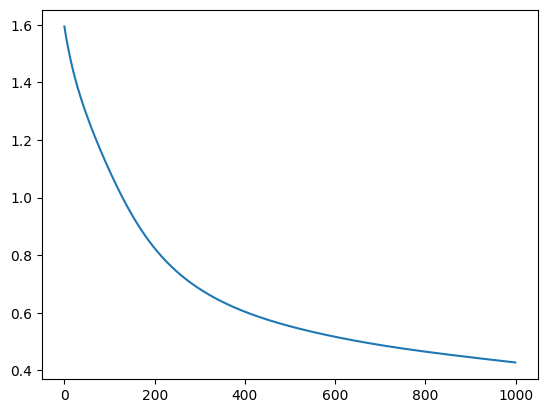

In [ ]:
plt.plot(loss_list)
print(loss_list[-1])

## Inferencing

In [ ]:
# Inference
y_preds = X_test @ w1 + b1
h1 = tanh(y_preds)

y_preds = h1 @ w2 + b2
h2 = tanh(y_preds)

y_preds = h2 @ w3 + b3
h3 = tanh(y_preds)

y_preds = h3 @ w4 + b4

# Softmax application
logit_max = y_preds.max(dim=1, keepdim=True).values
logit_new = y_preds - logit_max
logit_exp = logit_new.exp()
logit_exp_sum = logit_exp.sum(dim=1, keepdim=True)
logit_exp_sum_inv = logit_exp_sum ** (-1)
probs = logit_exp * logit_exp_sum_inv

# Predicted class = argmax of probabilities
pred_labels = probs.argmax(dim=1)
print(pred_labels[:10])
print(y_test[:10])

correct_predictions = (y_test == pred_labels).sum()
total_samples = y_test.shape[0]
accuracy = correct_predictions.item() / total_samples

print("Correct Predictions:", correct_predictions.item(),"out of", total_samples)
print(f"Accuracy: {accuracy:.4f}")

tensor([3, 0, 1, 1, 3, 4, 2, 3, 4, 4])
tensor([3, 0, 1, 2, 3, 4, 4, 3, 4, 4])
Correct Predictions: 1278 out of 1500
Accuracy: 0.8520
